In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import os

In [2]:
PATH = os.path.join('datasets', '06', 'movielens')
                    
movies = pd.read_csv(os.path.join(PATH, 'movies.csv'))
ratings = pd.read_csv(os.path.join(PATH, 'ratings.csv'))

In [3]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
len(movies.movieId.unique())

9742

In [5]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
len(ratings.movieId.unique())

9724

Potřebujeme mít jen filmy, pro které máme hodnocení

In [7]:
movie_list_rating = ratings.movieId.unique().tolist()
movies = movies[movies.movieId.isin(movie_list_rating)]

In [8]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [9]:
data = pd.merge(movies, ratings, on='movieId', how='left')
data

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [10]:
data.drop(['timestamp', 'genres'], axis=1, inplace=True)

In [11]:
data

,movieId,title,userId,rating
0,1,Toy Story (1995),1,4.0
1,1,Toy Story (1995),5,4.0
2,1,Toy Story (1995),7,4.5
3,1,Toy Story (1995),15,2.5
4,1,Toy Story (1995),17,4.5
...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),184,4.0
100832,193583,No Game No Life: Zero (2017),184,3.5
100833,193585,Flint (2017),184,3.5
100834,193587,Bungo Stray Dogs: Dead Apple (2018),184,3.5


In [12]:
movies_ratings = data.pivot(index='movieId', columns='userId', values='rating').fillna(0)

In [13]:
movies_ratings

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
movies_ratings_pd = pd.DataFrame(movies_ratings.to_numpy(), index=movies.title.tolist())

In [15]:
movies_ratings_pd

,0,1,2,3,4,5,6,7,8,9,...,600,601,602,603,604,605,606,607,608,609
Toy Story (1995),4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
Jumanji (1995),0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
Grumpier Old Men (1995),4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
Waiting to Exhale (1995),0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
No Game No Life: Zero (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flint (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bungo Stray Dogs: Dead Apple (2018),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
vect = np.array(movies_ratings_pd.loc['Forrest Gump (1994)']).reshape(1,-1)

In [18]:
vect

array([[4. , 0. , 0. , 0. , 0. , 5. , 5. , 3. , 0. , 3.5, 5. , 0. , 0. ,
        4. , 5. , 3.5, 5. , 4.5, 2. , 0. , 4.5, 5. , 0. , 4.5, 0. , 3. ,
        5. , 4. , 4.5, 0. , 0. , 0. , 5. , 4. , 0. , 0. , 4. , 3. , 0. ,
        0. , 2. , 5. , 5. , 0. , 5. , 0. , 4.5, 0. , 4. , 3. , 0. , 5. ,
        0. , 4. , 0. , 5. , 4. , 4. , 0. , 0. , 0. , 5. , 3.5, 4. , 0. ,
        5. , 4.5, 3.5, 4. , 4. , 0. , 4. , 0. , 0. , 0. , 1. , 0. , 3. ,
        0. , 0. , 2. , 4.5, 4.5, 5. , 0. , 4. , 0. , 0. , 0.5, 0. , 3. ,
        0. , 5. , 3. , 0. , 0. , 0. , 5. , 0. , 4. , 0. , 5. , 4. , 4. ,
        3.5, 0. , 0. , 0. , 5. , 0. , 5. , 3.5, 4. , 0. , 0. , 4. , 4. ,
        0. , 4. , 0. , 4. , 5. , 0. , 5. , 5. , 4. , 0. , 0. , 0. , 0. ,
        3. , 4. , 4. , 0. , 0. , 0. , 3.5, 0. , 0. , 4. , 4. , 4. , 5. ,
        4. , 0. , 0. , 0. , 4. , 0. , 0. , 0. , 0. , 3.5, 5. , 0. , 3. ,
        0. , 0. , 4. , 3. , 0. , 5. , 0. , 0. , 0. , 4. , 3. , 4. , 4.5,
        4. , 0. , 0. , 5. , 3. , 0. , 0. , 5. , 4.5

In [19]:
score = cosine_similarity(movies_ratings, vect).reshape(-1)

In [20]:
score

array([0.54709591, 0.45801097, 0.26065354, ..., 0.        , 0.        ,
       0.        ])

In [21]:
dictDf = {'collaborative': score} 
similar = pd.DataFrame(dictDf, index = movies_ratings_pd.index)

similar.sort_values('collaborative', ascending=False, inplace=True)

similar[1:].head(10)

,collaborative
"Shawshank Redemption, The (1994)",0.712993
Jurassic Park (1993),0.688259
Pulp Fiction (1994),0.685544
Braveheart (1995),0.643090
"Silence of the Lambs, The (1991)",0.639463
Apollo 13 (1995),0.627559
"Matrix, The (1999)",0.609935
Mrs. Doubtfire (1993),0.607983
Schindler's List (1993),0.602072
Terminator 2: Judgment Day (1991),0.600886


### Pokud bychom měli příliš mnoho dimenzí (příliš mnoho uživatelů), musíme udělat redukci

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
movies_ratings_reduced = pca.fit_transform(movies_ratings)

In [23]:
movies_ratings_reduced.shape

(9724, 337)

In [24]:
movies_ratings_reduced_pd = pd.DataFrame(movies_ratings_reduced, index=movies.title.tolist())

In [25]:
vect = np.array(movies_ratings_reduced_pd.loc['Forrest Gump (1994)']).reshape(1,-1)
score = cosine_similarity(movies_ratings_reduced, vect).reshape(-1)

dictDf = {'collaborative': score} 

similar = pd.DataFrame(dictDf, index = movies_ratings_reduced_pd.index)
similar.sort_values('collaborative', ascending=False, inplace=True)
similar[1:].head(10)

,collaborative
"Shawshank Redemption, The (1994)",0.706920
Jurassic Park (1993),0.681531
Pulp Fiction (1994),0.678584
Braveheart (1995),0.633698
"Silence of the Lambs, The (1991)",0.629463
Apollo 13 (1995),0.619173
Mrs. Doubtfire (1993),0.599121
"Matrix, The (1999)",0.596797
Schindler's List (1993),0.589257
Terminator 2: Judgment Day (1991),0.588891


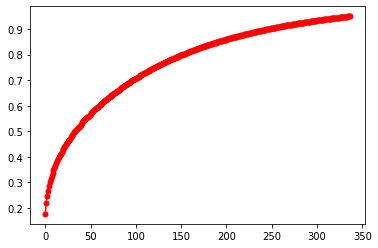

In [26]:
explained = pca.explained_variance_ratio_.cumsum()
plt.plot(explained, '.-', ms = 10, color='red')

In [27]:
explained

array([0.17620942, 0.21810448, 0.24488319, 0.26588979, 0.28445701,
       0.2997361 , 0.31393003, 0.32571723, 0.3371171 , 0.347089  ,
       0.35643459, 0.36541406, 0.37421423, 0.38234252, 0.39015091,
       0.3978759 , 0.40526411, 0.41209987, 0.4187702 , 0.4252498 ,
       0.43164441, 0.43770097, 0.44356639, 0.44932808, 0.45500518,
       0.46040919, 0.46570352, 0.47091437, 0.47600081, 0.48091757,
       0.4858134 , 0.49062912, 0.4953183 , 0.49992841, 0.50440617,
       0.50883455, 0.513233  , 0.51755767, 0.52185174, 0.52607776,
       0.53027864, 0.53438991, 0.53841545, 0.54227641, 0.54611835,
       0.54994908, 0.55372503, 0.55745866, 0.56110302, 0.56471215,
       0.56828168, 0.5718441 , 0.57536813, 0.57883177, 0.5822534 ,
       0.58561058, 0.58891419, 0.59219632, 0.5954337 , 0.5986293 ,
       0.60181918, 0.60499307, 0.60811927, 0.61123202, 0.61431703,
       0.61735747, 0.62033492, 0.62330242, 0.62624035, 0.62913716,
       0.63200757, 0.63484653, 0.63765957, 0.64045751, 0.64321

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(movies_ratings)

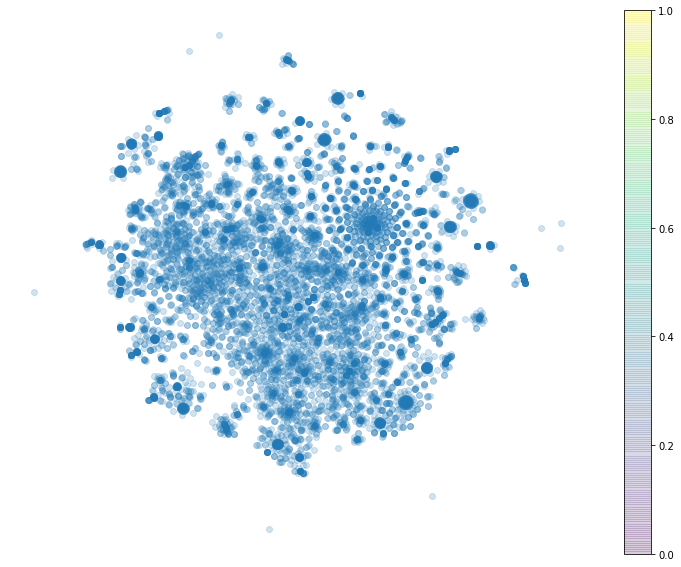

In [29]:
from matplotlib import pyplot as plt

plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], alpha=0.2)
plt.axis('off')
plt.colorbar()
plt.show()

### Content filtering

In [30]:
tags = pd.read_csv(os.path.join(PATH, 'tags.csv'))

In [31]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


Spojíme vše dohromady

In [32]:
mixed = pd.merge(movies, tags, on='movieId', how='left')
mixed.fillna('', inplace=True)
mixed = pd.DataFrame(mixed.groupby('movieId')['tag'].apply(lambda x: "%s" % str.join(' ', x)))
final = pd.merge(movies, mixed, on='movieId', how='left')
final['metadata'] = final[['tag', 'genres']].apply(lambda x: str.join(' ', x), axis=1)

In [33]:
final

,movieId,title,genres,tag,metadata
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar pixar fun,pixar pixar fun Adventure|Animation|Children|C...
1,2,Jumanji (1995),Adventure|Children|Fantasy,fantasy magic board game Robin Williams game,fantasy magic board game Robin Williams game A...
2,3,Grumpier Old Men (1995),Comedy|Romance,moldy old,moldy old Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,,Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy,pregnancy remake,pregnancy remake Comedy
...,...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,,Action|Animation|Comedy|Fantasy
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,,Animation|Comedy|Fantasy
9721,193585,Flint (2017),Drama,,Drama
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,,Action|Animation


In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [35]:
pipeline = Pipeline([
    ('bow', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
])

matrix = pipeline.fit_transform(final['metadata']).toarray()

In [36]:
matrix.shape

(9724, 1746)

In [37]:
metadata_pd = pd.DataFrame(matrix, index=movies_ratings_pd.index)
metadata_pd

,0,1,2,3,4,5,6,7,8,9,...,1736,1737,1738,1739,1740,1741,1742,1743,1744,1745
Toy Story (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Jumanji (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Waiting to Exhale (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Father of the Bride Part II (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Black Butler: Book of the Atlantic (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
No Game No Life: Zero (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Flint (2017),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bungo Stray Dogs: Dead Apple (2018),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
vect = np.array(metadata_pd.loc['Toy Story (1995)']).reshape(1,-1)

In [39]:
score = cosine_similarity(metadata_pd, vect).reshape(-1)

In [40]:
dictDf = {'content': score} 
similar = pd.DataFrame(dictDf, index = movies_ratings_pd.index)

similar.sort_values('content', ascending=False, inplace=True)

similar[1:].head(10)

,content
"Bug's Life, A (1998)",0.862226
Toy Story 2 (1999),0.644043
Guardians of the Galaxy 2 (2017),0.367681
"Tale of Despereaux, The (2008)",0.357892
Asterix and the Vikings (Astérix et les Vikings) (2006),0.357892
Shrek the Third (2007),0.357892
Turbo (2013),0.357892
The Good Dinosaur (2015),0.357892
"Monsters, Inc. (2001)",0.357892
Antz (1998),0.357892
